Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train')
data_dir_test = pathlib.Path('D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed = 123,
                                                               validation_split = 0.2,
                                                               subset = 'training',
                                                               image_size = (img_height,img_width),  
                                                               batch_size = batch_size) ##todo

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed = 123,
                                                               validation_split = 0.2,
                                                               subset = 'validation',
                                                               image_size = (img_height,img_width),  
                                                               batch_size = batch_size) ##todo

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

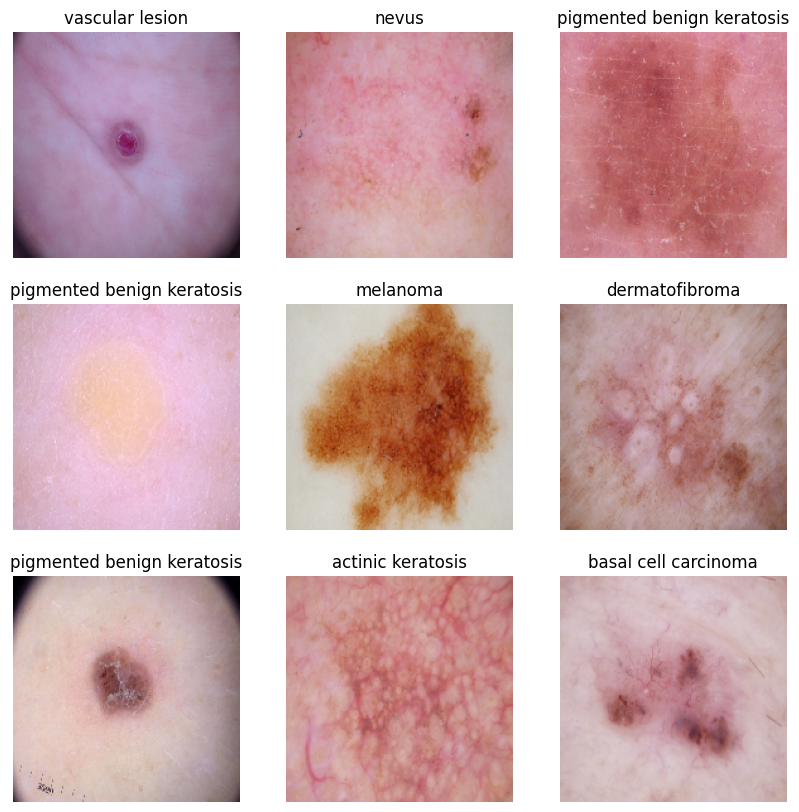

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in train_ds.take(1):
  for j in range(9):
    ax = plt.subplot(3,3,j+1)
    plt.imshow(i[0][j].numpy().astype('uint8'))
    plt.title(class_names[i[1][j]])
    plt.axis('off')
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255)])

In [12]:
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (img_height,img_width,3)))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))

model.add(Dense(len(class_names)))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [13]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
# View the summary of all layers
model.build(input_shape = [None, img_height, img_width, 3])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                   

### Train the model

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 73s 1s/step - loss: 1.9957 - accuracy: 0.2969 - val_loss: 1.6643 - val_accuracy: 0.4116
Epoch 2/20
56/56 [==============================] - 61s 1s/step - loss: 1.5744 - accuracy: 0.4509 - val_loss: 1.4724 - val_accuracy: 0.4787
Epoch 3/20
56/56 [==============================] - 70s 1s/step - loss: 1.3453 - accuracy: 0.5301 - val_loss: 1.4047 - val_accuracy: 0.4877
Epoch 4/20
56/56 [==============================] - 60s 1s/step - loss: 1.1917 - accuracy: 0.5865 - val_loss: 1.3851 - val_accuracy: 0.5459
Epoch 5/20
56/56 [==============================] - 64s 1s/step - loss: 1.0955 - accuracy: 0.6150 - val_loss: 1.4739 - val_accuracy: 0.5414
Epoch 6/20
56/56 [==============================] - 59s 1s/step - loss: 0.9566 - accuracy: 0.6501 - val_loss: 1.8493 - val_accuracy: 0.5145
Epoch 7/20
56/56 [==============================] - 59s 1s/step - loss: 0.7789 - accuracy: 0.7294 - val_loss: 1.5638 - val_accuracy: 0.5280
Epoch 8/20
56/56 [==

### Visualizing training results

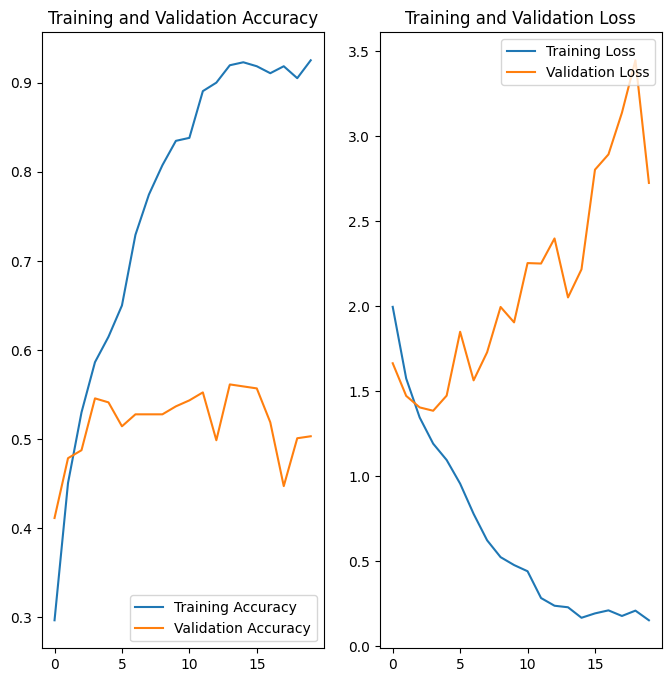

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

In [17]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomCrop(224,224)
  ]
)

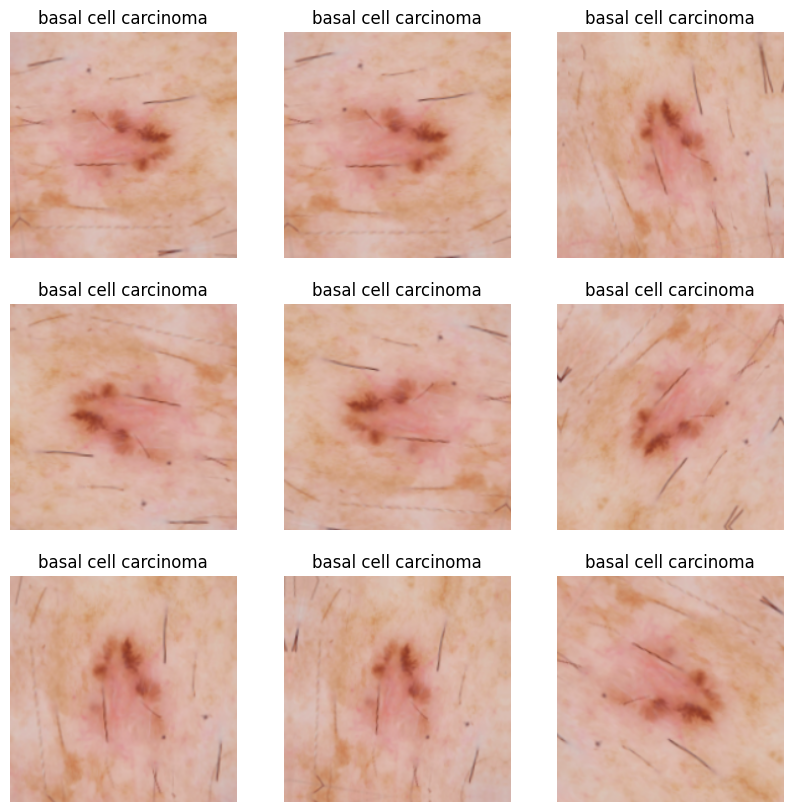

In [18]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for i in train_ds.take(3):
  for j in range(9):
    ax = plt.subplot(3,3,j+1)
    #image = tf.keras.preprocessing.image.array_to_img(i[0][0])
    #image = transform(image)
    image = data_augmentation(i[0])
    #image = image.squeeze().permute(1,2,0)
    plt.imshow(image[0].numpy().astype('uint8'))
    plt.title(class_names[i[1][0]])
    plt.axis('off')

### Todo:
### Create the model, compile and train the model


In [19]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([data_augmentation,layers.experimental.preprocessing.Rescaling(1./255)])

In [20]:
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'same', input_shape = (img_height,img_width,3)))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(len(class_names)))

### Compiling the model

In [21]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [22]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 110s 2s/step - loss: 2.5901 - accuracy: 0.2701 - val_loss: 1.6976 - val_accuracy: 0.3803
Epoch 2/20
56/56 [==============================] - 116s 2s/step - loss: 1.7642 - accuracy: 0.3795 - val_loss: 1.6821 - val_accuracy: 0.4497
Epoch 3/20
56/56 [==============================] - 111s 2s/step - loss: 1.6231 - accuracy: 0.4113 - val_loss: 1.7110 - val_accuracy: 0.3960
Epoch 4/20
56/56 [==============================] - 101s 2s/step - loss: 1.5758 - accuracy: 0.4559 - val_loss: 1.4108 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 104s 2s/step - loss: 1.5173 - accuracy: 0.4693 - val_loss: 1.3956 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 99s 2s/step - loss: 1.5566 - accuracy: 0.4487 - val_loss: 1.5222 - val_accuracy: 0.4631
Epoch 7/20
56/56 [==============================] - 96s 2s/step - loss: 1.4587 - accuracy: 0.4771 - val_loss: 1.3602 - val_accuracy: 0.5324
Epoch 8/20
56/5

### Visualizing the results

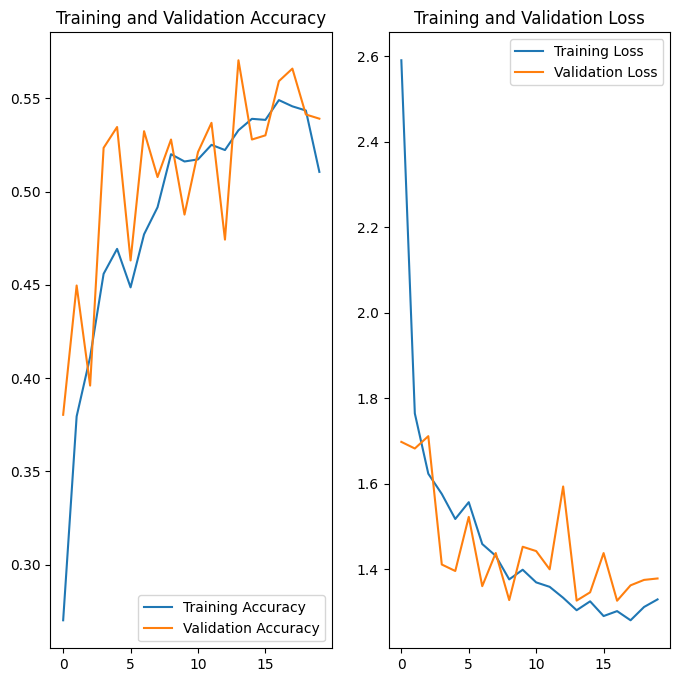

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [24]:
## Your code goes here.
df = list(data_dir_train.glob('*/*.jpg'))

In [25]:
dataframe = pd.DataFrame(columns = ['Path','Disease'])

In [26]:
for i in df:
    #rec = {'Path' : str(i), 'Disease' : str(i).split('\\')[4]}
    dataframe.loc[len(dataframe.index)] = [str(i),str(i).split('\\')[4]]

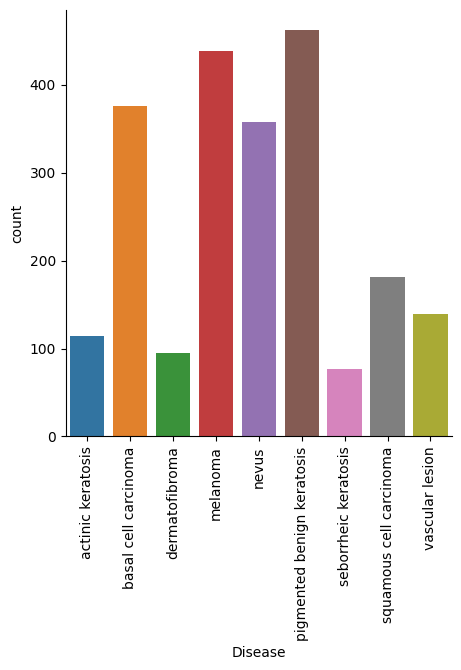

In [27]:
import seaborn as sns
sns.catplot(data = dataframe,x = 'Disease', kind = 'count')
plt.xticks(rotation = 90)
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [29]:
os.path.exists('D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis')

True

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FA105ADF40>: 100%|█| 500/500 [00:05<00:00, 93.20 Samples/


Initialised with 376 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FA109FBCA0>: 100%|█| 500/500 [00:04<00:00, 100.75 Samples


Initialised with 95 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FA10601370>: 100%|█| 500/500 [00:05<00:00, 95.21 Samples/


Initialised with 438 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x1FA1017AE80>: 100%|█| 500/500 [00:22<00


Initialised with 357 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x1FA19235BB0>: 100%|█| 500/500 [00:23<00:


Initialised with 462 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FA14224C10>: 100%|█| 500/500 [00:05<00:00, 96.92 Samples/


Initialised with 77 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1FA1041A610>: 100%|█| 500/500 [00:11<00:00, 43.70 Samples


Initialised with 181 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FA102E7130>: 100%|█| 500/500 [00:05<00:00, 94.64 Samples/


Initialised with 139 image(s) found.
Output directory set to D:\AI and ML\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1FA106564F0>: 100%|█| 500/500 [00:05<00:00, 96.72 Samples/


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_bb73150e-7594-43ab-9848-99fb45cbc2d7.jpg',
 'D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_31f244b5-c487-4400-9ec1-dda55315e382.jpg',
 'D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_53771c4b-e290-442a-b693-a35659b07a01.jpg',
 'D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_6f3b830e-6a16-4a3d-bf2f-d7f955185fe6.jpg',
 'D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025953.jpg_1e77a5e5-0720-4b4f-982e-b4893c5f710c.j

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [34]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [35]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = dataframe.append(df2)

C:\Users\GNYANESH\AppData\Local\Temp\ipykernel_33568\2464340760.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = dataframe.append(df2)


In [36]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [38]:
data_dir_train="D:\\AI and ML\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [40]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([layers.experimental.preprocessing.Rescaling(1./255)])

In [41]:
model.add(Conv2D(16, kernel_size = (3,3), activation = 'gelu', padding = 'same', input_shape = (img_height,img_width,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'gelu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'gelu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.20))

#model.add(Conv2D(128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation = 'gelu'))
#model.add(Dense(128, activation = 'relu',kernel_regularizer = l2(0.01)))
#model.add(Dropout(0.2))

model.add(Dense(len(class_names)))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [42]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [43]:
epochs = 20
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 [==============================] - 128s 647ms/step - loss: 1.8297 - accuracy: 0.3160 - val_loss: 1.5461 - val_accuracy: 0.4499
Epoch 2/20
169/169 [==============================] - 105s 620ms/step - loss: 1.3433 - accuracy: 0.4957 - val_loss: 1.2855 - val_accuracy: 0.5108
Epoch 3/20
169/169 [==============================] - 104s 614ms/step - loss: 1.1378 - accuracy: 0.5810 - val_loss: 1.0873 - val_accuracy: 0.5872
Epoch 4/20
169/169 [==============================] - 102s 607ms/step - loss: 0.9573 - accuracy: 0.6526 - val_loss: 0.9536 - val_accuracy: 0.6578
Epoch 5/20
169/169 [==============================] - 103s 610ms/step - loss: 0.7429 - accuracy: 0.7333 - val_loss: 0.9162 - val_accuracy: 0.6830
Epoch 6/20
169/169 [==============================] - 103s 611ms/step - loss: 0.6014 - accuracy: 0.7858 - val_loss: 0.7331 - val_accuracy: 0.7565
Epoch 7/20
169/169 [==============================] - 102s 604ms/step - loss: 0.4387 - accuracy: 0.8557 - val_loss: 0.6635 -

#### **Todo:**  Visualize the model results

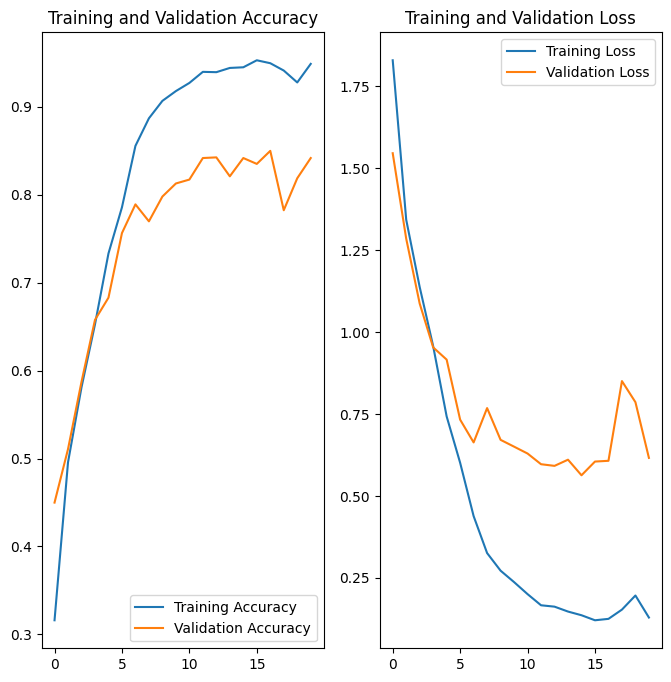

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

